## B cells versus T cells: Comparing two time points
The data used in this notebook is lymphocyte data for two patient's B cells and T cells. We use this data to show the proteome variation between the cell types.


First, we import our loader module. This brings the functions defined there (in our repository at ~/load_data.py) into scope so we can use them in this script. Then we can load our data and store it as <code>data</code>.

Calling <code>head</code> shows the first several lines of the dataframe, which provides an idea of the type of data present and the structure of the dataframe.

In [1]:
import load_data
data_raw = load_data.load_FragPipe(month="all", contains=[])

data_raw

,Blank_3,Blank_4,Blank_5,Subject1_B_cells_062920_C_10,Subject1_B_cells_062920_C_11,Subject1_B_cells_062920_C_12,Subject1_B_cells_062920_C_13,Subject1_B_cells_062920_C_9,Subject1_B_cells_072920_C_4,Subject1_B_cells_072920_C_5,...,Subject2_T_cells_062920_F_12,Subject2_T_cells_062920_F_13,Subject2_T_cells_062920_F_14,Subject2_T_cells_062920_F_9,Subject2_T_cells_072920_F_1,Subject2_T_cells_072920_F_3,Subject2_T_cells_072920_F_4,Subject2_T_cells_072920_F_5,Subject2_T_cells_072920_F_6,Subject2_T_cells_072920_F_8
Protein ID,,,,,,,,,,,,,,,,,,,,,
A0A0B4J2D5,0.0,0.0,0.0,2704727.2,4026144.0,6239643.0,7219690.0,3735750.0,0.0,4245728.5,...,0.0,4403834.0,0.0,3031510.2,4347314.50,1467622.6,5215029.5,2219454.2,7203359.00,4860379.50
A0AVT1,0.0,0.0,0.0,1609927.0,2586438.5,3274889.8,1575755.6,4662625.5,3079791.0,2207909.8,...,1060859.1,578449.1,563711.6,0.0,0.00,0.0,0.0,758329.7,1115380.20,0.00
A0FGR8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1477135.8,797184.1,0.0,0.0,0.00,0.0,0.0,0.0,579667.44,754330.70
A6NHR9,0.0,0.0,0.0,1929133.5,0.0,3187665.8,0.0,0.0,1703176.6,833782.8,...,0.0,0.0,0.0,0.0,391232.84,0.0,0.0,0.0,516911.80,794891.44
A8K2U0,0.0,0.0,0.0,0.0,0.0,0.0,1075220.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O15068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00
Q14C86,0.0,0.0,0.0,0.0,0.0,859012.7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,912507.20,0.00
Q8N4T8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00


Here we define the cell types we will look at. There are five replicates of each. In comparing across time points, instrument sensitivity, run quality, and other complications may vary the depth of proteome coverage; proteins unidentified at one time may be seen at another, which might represent false on-off changes. Here we address that concern by comparing proteins consistently identifed - which we define as in half of the replicates, or here at least 3 out of 5 - in all cell types.

In [2]:
cell_types = ["1_B_cells_062920","1_B_cells_072920", "2_B_cells_062920",  "2_B_cells_072920",
              "1_T_cells_062920","1_T_cells_072920","2_T_cells_062920", "2_T_cells_072920"]

cell_categories = {
    "subject":["Subject1","Subject2"],
    "population":["B_cells","T_cells"], #Cell types; these strings are in the sample names of those types
    "date":["062920","072920"],
    "subject_and_population":["1_B_cells","1_T_cells", "2_B_cells",  "2_T_cells"],
    "population_and_date":["B_cells_062920","T_cells_062920", "B_cells_072920",  "T_cells_072920"],
    "c4":["B_cells_062920","T_cells_062920", "B_cells_072920",  "T_cells_072920", 'C_4'],
    "all_divisions": cell_types
}

In [3]:
from numpy import nan
from numpy import log2
from statistics import median
import matplotlib.pyplot as plt

Before any analysis, we log normalize.

In [4]:
data_log2 = log2(data_raw.replace(0,nan))

These are some methods defined in data_utils.py to help with data processing.

In [5]:
import data_utils

Next, we select the proteins that are measured in at least three samples from each group, allowing the calculations to proceed without imputed zero-handling.

In [6]:
indecies = data_log2.apply(data_utils.check_three_of_each_type, axis=1, cell_types=cell_types)
data = data_log2[indecies]

Here we TMM normalize between runs. This centers the spread of data to remove "batch" effects and reveal biological differences.

In [7]:
data = data.apply(lambda series: series-median(series.dropna()))

In [8]:
print ("Total groups identified:")
print(data_raw.shape[0])

print ("Proteins identified in at least 3 of each cell type:\t")
print (data.shape[0])

Total groups identified:
2426
Proteins identified in at least 3 of each cell type:	
898


In [9]:
import plot_utils

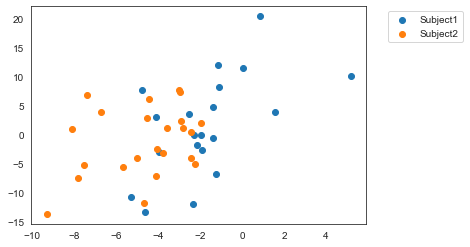

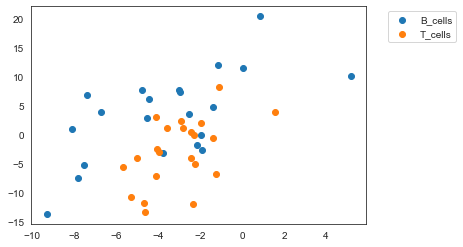

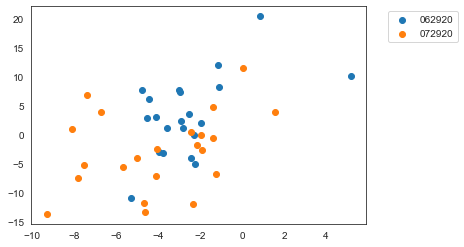

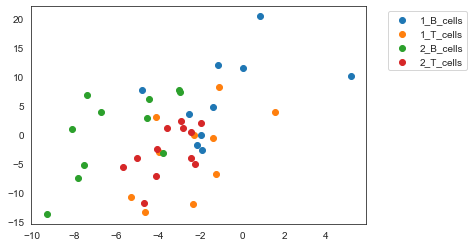

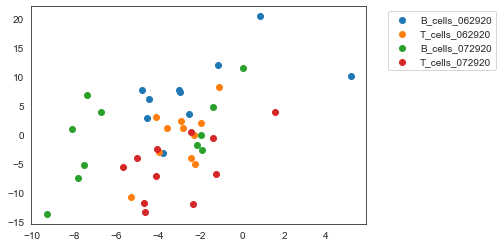

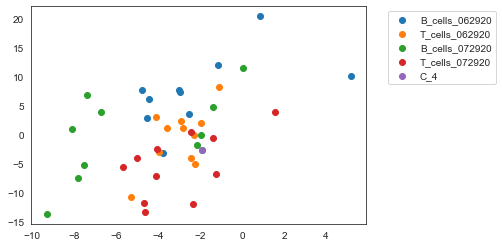

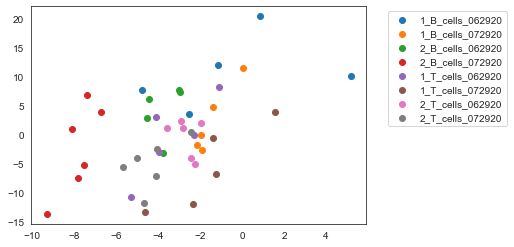

In [10]:
for c in cell_categories:
    plot_utils.PCA_by_type(data, cell_types=cell_categories[c])
    #plt.savefig("data/T1T2_{0}.png".format(c), dpi=300, bbox_inches='tight')

### Reproducibility and correlations: 
Here we examine the reproducibility between technical replicates and across sample types. First, notice that the "blanks" which are supernatant controls, while showing some proteins, are very distinct from any samples. Next, we'll leave these out to better illustrate patterns within the samples.

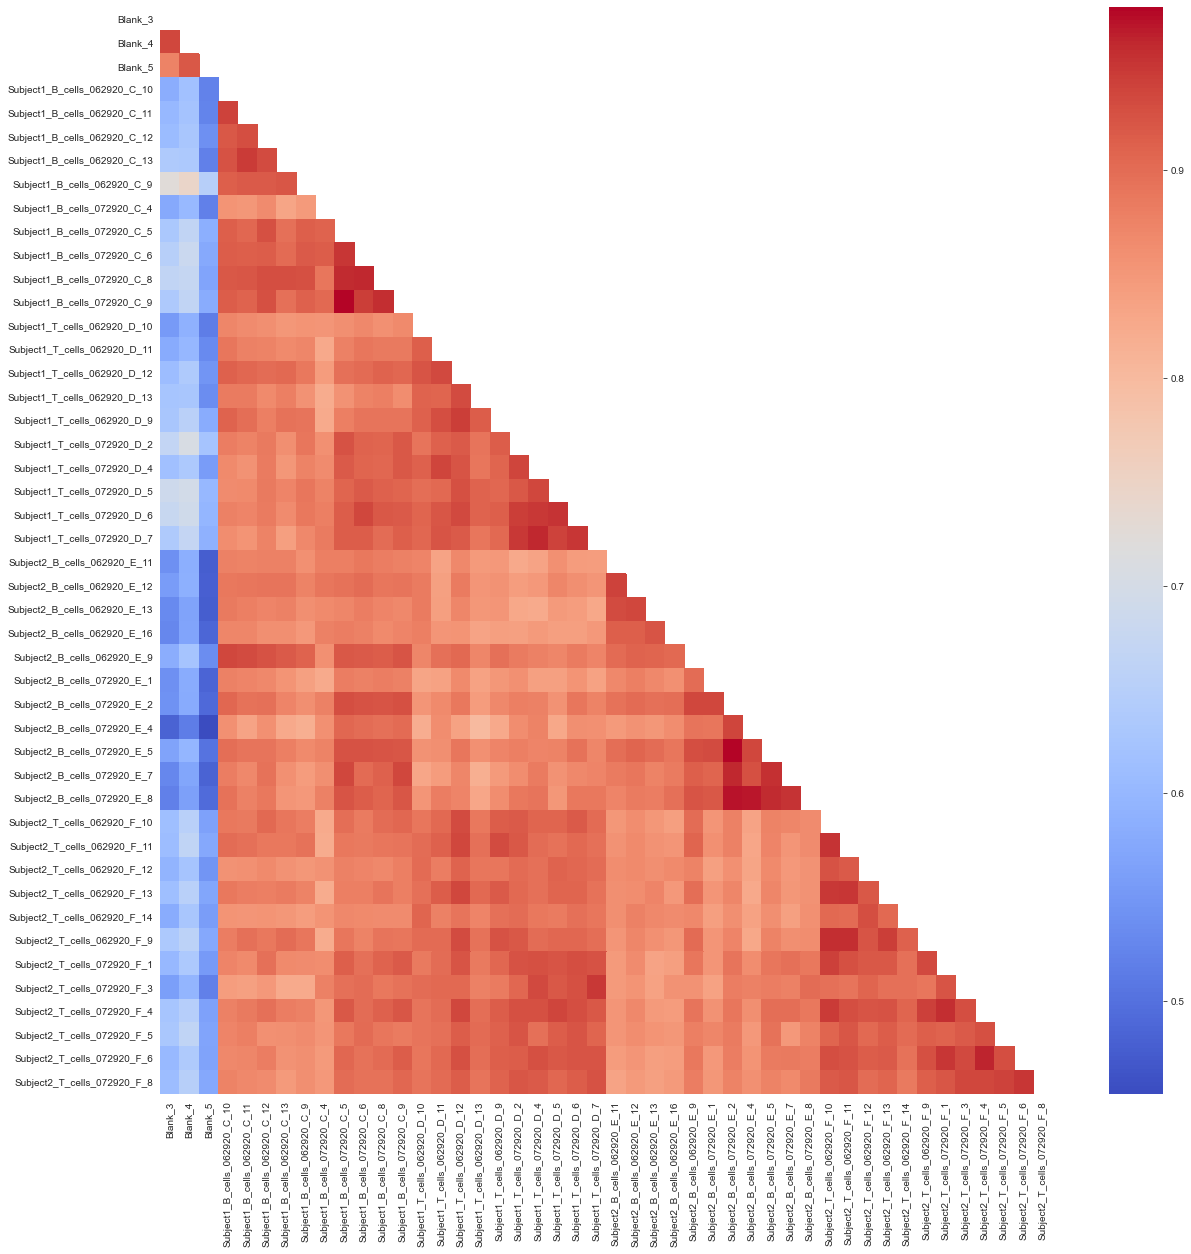

In [11]:
import seaborn as sns

correlations = data.corr(method="spearman")

#labels=['B cells - C10','B cells - C11',
#                    'B cells - C12','B cells - C13',
#                    'B cells - C9  ','T cells - D10',
#                    'T cells - D11','T cells - D12',
#                    'T cells - D13','T cells - D9  ']

#correlations.index=labels
#correlations.columns=labels

import numpy as np
mask = np.zeros(correlations.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

fig = plt.figure(figsize=(20,20))
sns.heatmap(correlations, cmap = 'coolwarm', mask = mask)


plt.savefig("data/correlations_heatmap_all_2_FP.png", dpi=300,
            bbox_inches='tight')

In [12]:
sample_data =  data.drop(columns=['Blank_5','Blank_4','Blank_3'], inplace=False)

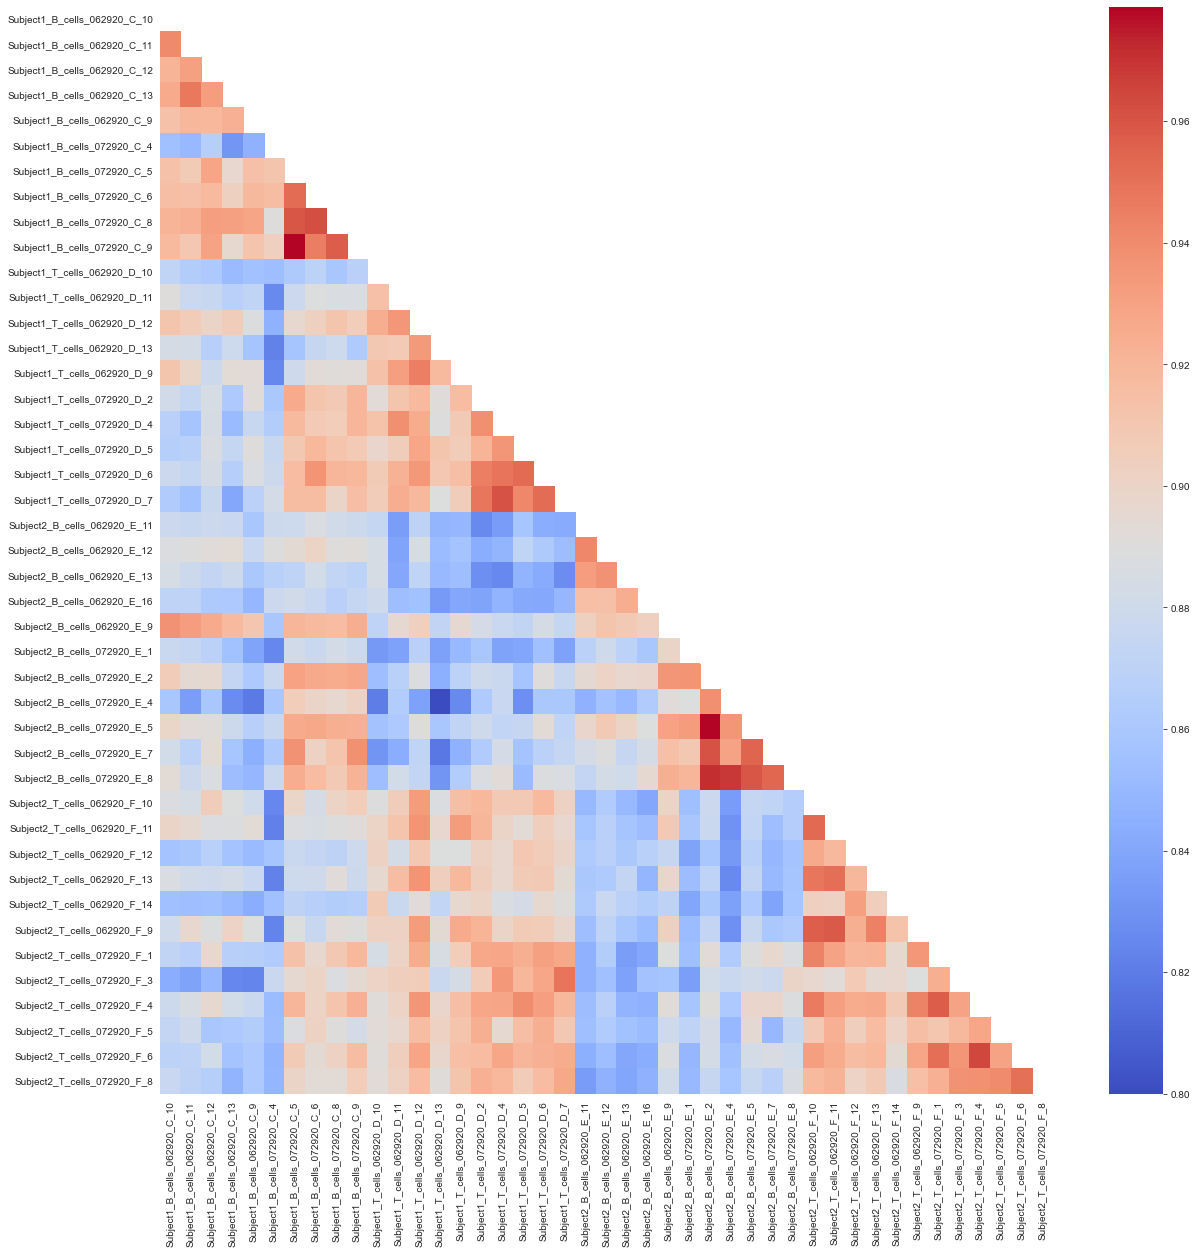

In [13]:
import seaborn as sns

correlations = sample_data.corr(method="spearman")

#labels=['B cells - C10','B cells - C11',
#                    'B cells - C12','B cells - C13',
#                    'B cells - C9  ','T cells - D10',
#                    'T cells - D11','T cells - D12',
#                    'T cells - D13','T cells - D9  ']

#correlations.index=labels
#correlations.columns=labels

import numpy as np
mask = np.zeros(correlations.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

fig = plt.figure(figsize=(20,20))
sns.heatmap(correlations, cmap = 'coolwarm', mask = mask)


plt.savefig("data/correlations_heatmap_all_samples_FP.png", dpi=300,
            bbox_inches='tight')